In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
users = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\users_new.csv')

In [3]:
trans1 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_1.csv')

In [4]:
trans2 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_2.csv')

In [5]:
trans3 = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\transactions_3.csv')

In [6]:
transactions = pd.concat([trans1,trans2,trans3])

# 4.User modeling

# 4.1 MCC

In [7]:
def merchant_cat(x):
    if x in range(1,1500):
        return 'Agricultural Services'
    elif x in range(1500,3000):
        return 'Contracted Services'
    elif x in range(4000,4800):
        return 'Transportation Services'
    elif x in range(4800,5000):
        return 'Utility Services'
    elif x in range(5000,5600):
        return 'Retail Outlet Services'
    elif x in range(5600,5700):
        return 'Clothing Stores'
    elif x in range(5700,7300):
        return 'Miscellaneous Stores'
    elif x in range(7300,8000):
        return 'Business Services'
    elif x in range(8000,9000):
        return 'Professional Services and Membership Organizations'
    elif x in range(9000,9999):
        return 'Government Services'
    elif x in range(3000,3300):
        return 'Travel and Entertainment'
    elif x in range(3300,3500):
        return 'Car Rental'
    elif x in range(3500,4000):
        return 'Lodging'

In [8]:
transactions['ea_merchant_mcc']=transactions['ea_merchant_mcc'].fillna(0)

In [9]:
transactions['ea_merchant_mcc']=transactions['ea_merchant_mcc'].astype(int)

In [10]:
transactions['ea_merchant_mcc']=transactions['ea_merchant_mcc'].apply(merchant_cat)

In [11]:
transactions['ea_merchant_mcc'].value_counts()

Miscellaneous Stores                                  593707
Retail Outlet Services                                349368
Transportation Services                               141824
Business Services                                      75722
Clothing Stores                                        37822
Utility Services                                       20815
Professional Services and Membership Organizations     17089
Government Services                                     6642
Travel and Entertainment                                6329
Lodging                                                 3042
Agricultural Services                                   2480
Contracted Services                                     1170
Car Rental                                              1041
Name: ea_merchant_mcc, dtype: int64

In [12]:
merch_mcc = pd.crosstab(index=transactions['ea_merchant_mcc'], columns=transactions['user_id']).T

In [13]:
users =pd.merge(users,merch_mcc, how='left',left_on='user_id',right_index=True)

In [14]:
users

,Unnamed: 0,user_id,birth_year,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,North-East,UK,...,Clothing Stores,Contracted Services,Government Services,Lodging,Miscellaneous Stores,Professional Services and Membership Organizations,Retail Outlet Services,Transportation Services,Travel and Entertainment,Utility Services
0,0,user_0,13,1,1,0,0,3,0,1,...,10.0,0.0,0.0,0.0,34.0,0.0,277.0,20.0,0.0,1.0
1,1,user_1,12,0,1,1,0,75,1,0,...,3.0,0.0,3.0,0.0,28.0,0.0,38.0,11.0,0.0,0.0
2,2,user_2,14,0,1,0,0,71,1,0,...,1.0,0.0,1.0,0.0,27.0,0.0,71.0,5.0,0.0,0.0
3,3,user_3,11,1,1,0,0,219,1,0,...,4.0,0.0,1.0,0.0,85.0,0.0,33.0,3.0,0.0,2.0
4,4,user_4,13,1,1,0,0,0,0,1,...,2.0,0.0,1.0,0.0,16.0,0.0,5.0,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,15539,user_15539,14,0,2,0,0,0,1,0,...,5.0,0.0,0.0,0.0,26.0,0.0,10.0,13.0,0.0,20.0
15540,15540,user_15540,12,0,2,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0
15541,15541,user_15541,10,1,2,0,0,16,0,1,...,10.0,0.0,4.0,0.0,268.0,0.0,113.0,168.0,0.0,0.0
15542,15542,user_15542,10,1,1,0,1,44,1,0,...,0.0,0.0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0


In [15]:
users.isna().any()

Unnamed: 0                                            False
user_id                                               False
birth_year                                            False
city                                                  False
created_date                                          False
user_settings_crypto_unlocked                         False
plan                                                  False
num_contacts                                          False
North-East                                            False
UK                                                    False
West-South                                            False
brand                                                 False
number_of_transactions                                False
completed_transactions                                False
transactions_last_15_days                             False
total_amount_usd                                      False
total_amount_usd_completed              

In [16]:
users['Agricultural Services']=users['Agricultural Services'].fillna(0)
users['Business Services']= users['Business Services'].fillna(0)
users['Car Rental']=users['Car Rental'].fillna(0)
users['Clothing Stores']=users['Clothing Stores'].fillna(0)
users['Contracted Services']=users['Contracted Services'].fillna(0)
users['Lodging']=users['Lodging'].fillna(0)
users['Miscellaneous Stores']=users['Miscellaneous Stores'].fillna(0)
users['Professional Services and Membership Organizations']=users['Professional Services and Membership Organizations'].fillna(0)
users['Retail Outlet Services']=users['Retail Outlet Services'].fillna(0)
users['Transportation Services']=users['Transportation Services'].fillna(0)
users['Government Services']=users['Government Services'].fillna(0)
users['Travel and Entertainment']=users['Travel and Entertainment'].fillna(0)
users['Utility Services']=users['Utility Services'].fillna(0)

In [17]:
users.isna().any()

Unnamed: 0                                            False
user_id                                               False
birth_year                                            False
city                                                  False
created_date                                          False
user_settings_crypto_unlocked                         False
plan                                                  False
num_contacts                                          False
North-East                                            False
UK                                                    False
West-South                                            False
brand                                                 False
number_of_transactions                                False
completed_transactions                                False
transactions_last_15_days                             False
total_amount_usd                                      False
total_amount_usd_completed              

# 4.2 Merchant Country

In [18]:
def mcountry(x):
  if x in ('GBR','IRL','FRA','POL','NLD','LTU','ROM','DEU','LUX','CZE','CHE','SWE','HUN','DNK','LVA','EST','BEL','NOR','AUT','ROU','SVK','FIN','BGR','UKR','ISL','BLR','GEO','MCO','MDA','JEY',"SMR", "FRO", "LIE", "IMN"):
    return 'North-Europe'
  elif x in ('USA','CAN','BRA','MEX','ARG','COL','CHL','PER','CRI','GLP','PAN','BOL','URY','DOM','BRB','ECU','GTM','VEN',"ATG", "JAM", "BHM", "BHS", "CUB", "MTQ", "PRI", "LCA", "BLZ", "HND", "CYM", "SXM", "SLV", "NIC", "VGB", "GRD", "TCA", "DMA", "VIR", "AIA", "KNA", "ANT", "MAF","TTO", "PRY", "CUW", "GUF", "VCT", "SUR", "ABW"):
    return 'Americas'
  elif x in ('AUS','NZL','NCL',"PYF", "FJI", "COK", "VUT", "HMD", "PCN","GGY","QZZ", "AGB", "APT", "SGB", "PGB", "SCH"):
    return 'Oceania' 
  elif x in ('ZAF','MAR','KHM','EGY','TUN','MUS','JOR','KEN','LBN','MOZ','UGA','SEN',"NGA", "NER", "NAM", "TZA", "MWI", "CMR", "BWA", "CPV", "SYC", "MDG", "MYT", "ZWE", "GHA", "GMB", "ZMB", "ETH", "DZA", "BFA", "GIN", "BEN", "TCD", "GAB", "ZAR", "AGO", "RWA", "SWZ", "GNQ", "TGO", "LSO", "COD"):
    return 'Africa'
  elif x in ('JPN','ISR','THA','TUR','SGP','ARE','RUS','IDN','HKG','VNM','MYS','IND','KOR','CHN','PHL','LKA','TWN','QAT','SAU','LAO',"BHR", "MDV", "KAZ", "OMN", "NPL", "CIV", "ARM", "MMR", "KGZ", "KWT", "AZE", "PAK", "PSE", "MAC", "MNG", "UZB", "BRN", "BGD", "TKM"):
    return 'Asia'
  elif x in ('ESP','ITA','MLT','PRT','GRC','CYP','SRB','AND','GIB','SVN','MNE','HRV','MKD','BIH',"ALB", "VAT"): 
    return 'South-Europe'

In [19]:
transactions['ea_merchant_country']=transactions['ea_merchant_country'].apply(mcountry)

In [20]:
transactions['ea_merchant_country'].value_counts()

North-Europe    911486
South-Europe    138397
Americas        107846
Asia             61122
Oceania          26224
Africa           11354
Name: ea_merchant_country, dtype: int64

In [21]:
 merch_country =pd.crosstab(index=transactions['ea_merchant_country'], columns=transactions['user_id']).T

In [22]:
users =pd.merge(users,merch_country, how='left',left_on='user_id',right_index=True)

In [23]:
users.isna().any()

Unnamed: 0                                            False
user_id                                               False
birth_year                                            False
city                                                  False
created_date                                          False
user_settings_crypto_unlocked                         False
plan                                                  False
num_contacts                                          False
North-East                                            False
UK                                                    False
West-South                                            False
brand                                                 False
number_of_transactions                                False
completed_transactions                                False
transactions_last_15_days                             False
total_amount_usd                                      False
total_amount_usd_completed              

In [24]:
users['Africa'] = users['Africa'].fillna(0)
users['Americas'] = users['Americas'].fillna(0)
users['Asia'] = users['Asia'].fillna(0)
users['North-Europe'] = users['North-Europe'].fillna(0)
users['Oceania'] = users['Oceania'].fillna(0)
users['South-Europe'] = users['South-Europe'].fillna(0)

# 4.3 K-means clustering

In [25]:
users.columns

Index(['Unnamed: 0', 'user_id', 'birth_year', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts', 'North-East',
       'UK', 'West-South', 'brand', 'number_of_transactions',
       'completed_transactions', 'transactions_last_15_days',
       'total_amount_usd', 'total_amount_usd_completed', 'EMAIL', 'PUSH',
       'SMS', 'PUSH_sent', 'EMAIL_sent', 'SMS_sent', 'Perc_comp_transactions',
       'Perc_compl_amount', 'transactions_april_2019',
       'transactions_Jan_Feb_Mar_2019', 'max_amount_usd_completed',
       'min_amount_usd_completed', 'mean_amount_usd_completed',
       'Agricultural Services', 'Business Services', 'Car Rental',
       'Clothing Stores', 'Contracted Services', 'Government Services',
       'Lodging', 'Miscellaneous Stores',
       'Professional Services and Membership Organizations',
       'Retail Outlet Services', 'Transportation Services',
       'Travel and Entertainment', 'Utility Services', 'Africa', 'Americas',
       'A

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [27]:
X = users[['birth_year','user_settings_crypto_unlocked','plan','North-East','UK','West-South','brand',
           'Agricultural Services','Business Services','Car Rental','Clothing Stores','Contracted Services',
           'Government Services','Lodging','Miscellaneous Stores','Professional Services and Membership Organizations','Retail Outlet Services',
           'Transportation Services','Travel and Entertainment','Utility Services','Perc_compl_amount',
           'Africa','Americas','Asia','North-Europe','Oceania', 'South-Europe']]

In [28]:
matrix = X.values
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=1000)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 3 The average silhouette_score is : 0.6470728047431583
For k = 4 The average silhouette_score is : 0.5410873535936738
For k = 5 The average silhouette_score is : 0.46466469747282657
For k = 6 The average silhouette_score is : 0.4486037651939227
For k = 7 The average silhouette_score is : 0.40488976179005665
For k = 8 The average silhouette_score is : 0.41010033095464266
For k = 9 The average silhouette_score is : 0.40691141196656594


In [29]:
k = 3
kmeans = KMeans(n_clusters = k, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)

In [30]:
pd.Series(clusters).value_counts()

0    13219
2     1993
1      332
dtype: int64

In [31]:
c=kmeans.cluster_centers_

In [32]:
clusters1 = pd.DataFrame(clusters)

In [33]:
users['clusters'] = clusters1

In [34]:
users.head()

,Unnamed: 0,user_id,birth_year,city,created_date,user_settings_crypto_unlocked,plan,num_contacts,North-East,UK,...,Transportation Services,Travel and Entertainment,Utility Services,Africa,Americas,Asia,North-Europe,Oceania,South-Europe,clusters
0,0,user_0,13,1,1,0,0,3,0,1,...,20.0,0.0,1.0,0.0,0.0,0.0,335.0,0.0,9.0,2
1,1,user_1,12,0,1,1,0,75,1,0,...,11.0,0.0,0.0,0.0,0.0,27.0,47.0,17.0,0.0,0
2,2,user_2,14,0,1,0,0,71,1,0,...,5.0,0.0,0.0,0.0,0.0,0.0,106.0,0.0,0.0,0
3,3,user_3,11,1,1,0,0,219,1,0,...,3.0,0.0,2.0,0.0,9.0,0.0,119.0,0.0,0.0,2
4,4,user_4,13,1,1,0,0,0,0,1,...,19.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,6.0,0


In [35]:
c

array([[1.12274756e+01, 1.58181406e-01, 4.97768364e-02, 3.26045843e-01,
        3.73477570e-01, 3.00476587e-01, 4.93985929e-01, 1.14305167e-01,
        2.44254482e+00, 4.29684545e-02, 1.41220970e+00, 3.86564793e-02,
        2.38293366e-01, 1.34805961e-01, 1.85166805e+01, 5.84159165e-01,
        9.61850367e+00, 3.90528784e+00, 2.18549058e-01, 6.75542779e-01,
        7.95849221e+01, 5.15394508e-01, 5.30516681e+00, 2.88909902e+00,
        2.13361828e+01, 1.24358877e+00, 6.62183221e+00],
       [1.19759036e+01, 4.03614458e-01, 3.46385542e-01, 3.58433735e-01,
        4.45783133e-01, 1.95783133e-01, 5.51204819e-01, 5.03012048e-01,
        3.53855422e+01, 2.40963855e-01, 1.68012048e+01, 1.03915663e+00,
        2.15662651e+00, 8.22289157e-01, 3.33852410e+02, 7.57831325e+00,
        1.95804217e+02, 8.77319277e+01, 2.89156627e+00, 8.69277108e+00,
        8.67654749e+01, 2.70180723e+00, 2.02289157e+01, 8.56024096e+00,
        6.41548193e+02, 3.22289157e+00, 1.71445783e+01],
       [1.19207225e+01

In [36]:
names =['birth_year','user_settings_crypto_unlocked','plan','North-East','UK','West-South','brand',
           'Agricultural Services','Business Services','Car Rental','Clothing Stores','Contracted Services',
           'Government Services','Lodging','Miscellaneous Stores','Professional Services and Membership Organizations','Retail Outlet Services',
           'Transportation Services','Travel and Entertainment','Utility Services','Perc_compl_amount',
            'Africa','Americas','Asia','North-Europe','Oceania', 'South-Europe']

Text(0, 0.5, 'Perc_compl_amount')

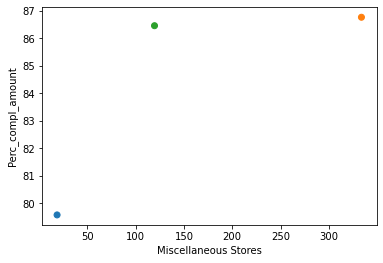

In [37]:
x1=14
x2=20
plt.scatter(c[:,x1],c[:,x2],c=['C0','C1','C2'])
plt.xlabel(names[x1])
plt.ylabel(names[x2])


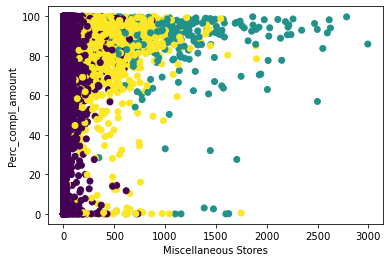

In [38]:
x1=14
x2=20
plt.scatter(c[:,x1],c[:,x2],c=['C0','C1','C2'])
plt.xlabel(names[x1])
plt.ylabel(names[x2])
plt.scatter(users.loc[:,'completed_transactions'],matrix[:,x2], c=clusters)

In [39]:
clusters

array([2, 0, 0, ..., 1, 0, 2])

In [40]:
users[clusters==0]['completed_transactions']

1        133.0
2        268.0
4         50.0
5          2.0
6         76.0
         ...  
15537      1.0
15538     14.0
15539     91.0
15540     10.0
15542     23.0
Name: completed_transactions, Length: 13219, dtype: float64

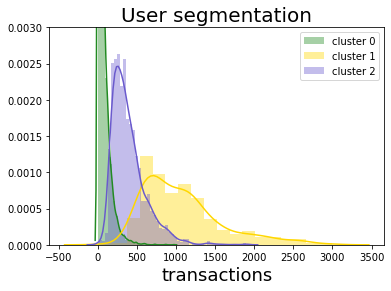

In [41]:
sns.distplot(users[clusters==0]['completed_transactions'],color='forestgreen')
sns.distplot(users[clusters==1]['completed_transactions'],color='gold')
sns.distplot(users[clusters==2]['completed_transactions'],color='slateblue')
plt.ylim([0,0.003])
plt.xlabel('transactions', fontsize=18)
plt.title('User segmentation',fontsize=20)
plt.legend(labels=['cluster 0','cluster 1','cluster 2'])